In [ ]:
!pip install -q keras

In [ ]:
from keras.layers import SimpleRNN


In [ ]:
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000  # 특성으로 사용할 단어의 수
maxlen = 500  # 사용할 텍스트의 길이(가장 빈번한 max_features 개의 단어만 사용)
batch_size = 32

print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), '훈련 시퀀스')
print(len(input_test), '테스트 시퀀스')

print('시퀀스 패딩 (samples x time)') 
input_train = sequence.pad_sequences(input_train, maxlen=maxlen) #시퀀스들을 텐서로 만들고 정사각형의 매트릭스꼴로 만듬. 비어있는 칸은 0으로 패딩
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기:', input_train.shape)
print('input_test 크기:', input_test.shape)

데이터 로딩...
17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

25000 훈련 시퀀스
25000 테스트 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기: (25000, 500)
input_test 크기: (25000, 500)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

from keras.layers import Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)


Epoch 1/10
157/157 [==============================] - 55s 328ms/step - loss: 0.6844 - acc: 0.5488 - val_loss: 0.6879 - val_acc: 0.5988
Epoch 2/10
157/157 [==============================] - 51s 324ms/step - loss: 0.4656 - acc: 0.7849 - val_loss: 0.7742 - val_acc: 0.6400
Epoch 3/10
157/157 [==============================] - 51s 322ms/step - loss: 0.3074 - acc: 0.8775 - val_loss: 0.3835 - val_acc: 0.8426
Epoch 4/10
157/157 [==============================] - 51s 328ms/step - loss: 0.2170 - acc: 0.9203 - val_loss: 0.4579 - val_acc: 0.8136
Epoch 5/10
157/157 [==============================] - 51s 325ms/step - loss: 0.1518 - acc: 0.9468 - val_loss: 0.4525 - val_acc: 0.8200
Epoch 6/10
157/157 [==============================] - 51s 325ms/step - loss: 0.0908 - acc: 0.9721 - val_loss: 0.4307 - val_acc: 0.8584
Epoch 7/10
157/157 [==============================] - 51s 324ms/step - loss: 0.0606 - acc: 0.9825 - val_loss: 0.6148 - val_acc: 0.8230
Epoch 8/10
157/157 [==============================] - 5

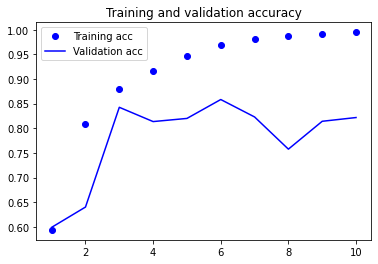

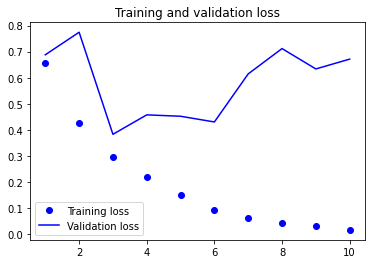

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 34s 28ms/step - loss: 0.6267 - acc: 0.6589 - val_loss: 0.4284 - val_acc: 0.8162
Epoch 2/10
157/157 [==============================] - 4s 25ms/step - loss: 0.3052 - acc: 0.8832 - val_loss: 0.3341 - val_acc: 0.8538
Epoch 3/10
157/157 [==============================] - 4s 25ms/step - loss: 0.2406 - acc: 0.9077 - val_loss: 0.2822 - val_acc: 0.8842
Epoch 4/10
157/157 [==============================] - 4s 24ms/step - loss: 0.1981 - acc: 0.9249 - val_loss: 0.3638 - val_acc: 0.8618
Epoch 5/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1783 - acc: 0.9356 - val_loss: 0.3498 - val_acc: 0.8792
Epoch 6/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1534 - acc: 0.9459 - val_loss: 0.5003 - val_acc: 0.8528
Epoch 7/10
157/157 [==============================] - 4s 25ms/step - loss: 0.1312 - acc: 0.9541 - val_loss: 0.3513 - val_acc: 0.8840
Epoch 8/10
157/157 [==============================] - 4s 25ms/step -

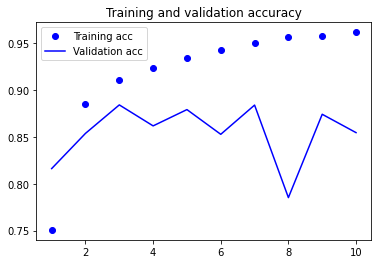

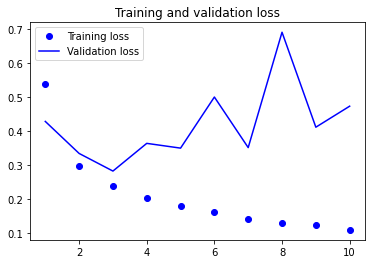

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()